In [1]:
from read_dataset import *
from model import *
from tools import *

In [2]:
# Load a SST dataset from online repository.
Xtrain, Xtest, Xtrain_clean, Xtest_clean, m, n = pendulum_data()

In [9]:
def Plot_Pendulum(data):
    plt.rcParams["figure.figsize"] = [7.00, 3.50]
    plt.rcParams["figure.autolayout"] = True
    ax = plt.subplot(1, 1, 1, projection='polar')
    ax.set_theta_direction(-1)
    ax.set_theta_offset(np.pi / 2.0)
    theta = np.linspace(0, 2 * np.pi, 37)
    ax.plot(np.sin(data),range(64))
    plt.show()

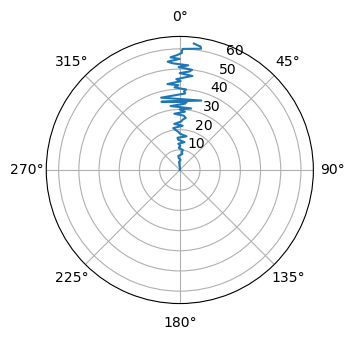

In [10]:
Plot_Pendulum(Xtrain[0])

In [13]:
mapsize=[4,10] # time dimension is important to define the SOM mapsize
               # both must be of the same order if we want the SOM space
               # to represent well the data evolution in time.
som=Atlantic_FullSOM(Xtrain,x=mapsize[0],y=mapsize[1])
#PATTERN = Patterns_SOMp(Xtrain,som)

 Training...
 pca_linear_initialization took: 0.021000 seconds
 Rough training...
 radius_ini: 2.000000 , radius_final: 1.000000, trainlen: 2

 epoch: 1 ---> elapsed time:  0.019000, quantization error: 9.088600

 epoch: 2 ---> elapsed time:  0.009000, quantization error: 7.145447

 Finetune training...
 radius_ini: 1.000000 , radius_final: 1.000000, trainlen: 3

 epoch: 1 ---> elapsed time:  0.027000, quantization error: 2.327420

 epoch: 2 ---> elapsed time:  0.005000, quantization error: 2.289518

 epoch: 3 ---> elapsed time:  0.005000, quantization error: 2.256616

 Final quantization error: 2.212796
 train took: 0.119000 seconds


Start Train
Finish Train


In [37]:
def Plot_neuronsp(PATTERN,x,y):
    fig = plt.figure(figsize=(y*9,x*3))
    n=1
    
    for p in progressbar(range(PATTERN.shape[0]-1,-1,-1), "Ploting neuron Patterns: ", 40):
        ## PLOT #########################################
        #
        ax = fig.add_subplot(x, y, n, aspect='equal',
                              projection='polar')
        #plt.rcParams["figure.figsize"] = [7.00, 3.50]
        #plt.rcParams["figure.autolayout"] = True
        ax.set_theta_direction(-1)
        ax.set_theta_offset(np.pi / 2.0)
        theta = np.linspace(0, 2 * np.pi, 37)
        ax.plot(np.sin(PATTERN[p]),range(64))
        n=n+1
        
    print('All done, the maps might take a while to appear')

In [38]:
PATTERN = Patterns_SOMp(Xtrain,som)

In [39]:
PATTERN.shape

(40, 64)

Ploting neuron Patterns: [########### VAI CORINTHIANS! ###########] 40/40
All done, the maps might take a while to appear


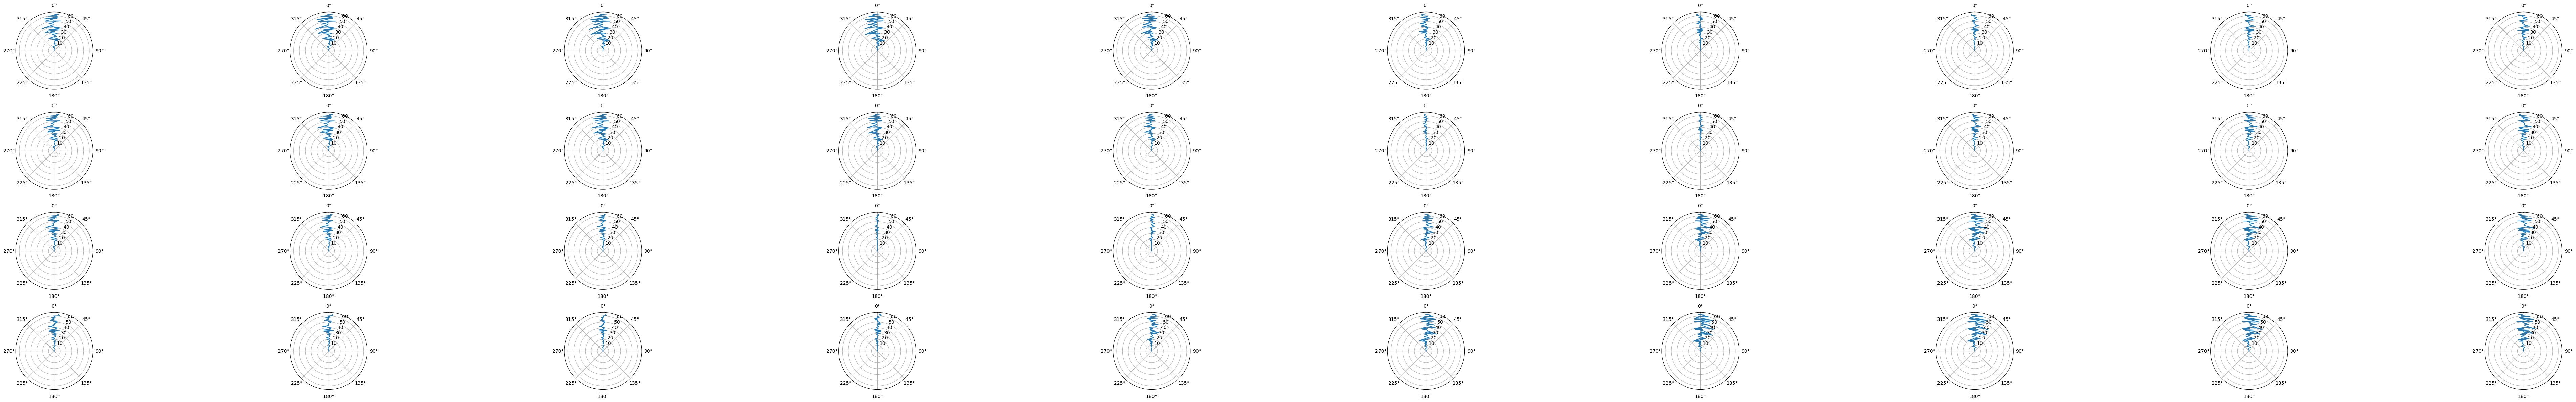

In [40]:
Plot_neuronsp(PATTERN,mapsize[0],mapsize[1])

In [42]:
# Computes the Correlation from the data series and the SOM neurons
Code, Prct, N_cluster = Correlacao(som,Xtest) ## Porcentagem_sst = [malha SOM, tempo da série temporal]
# Finds the Best Matching Unit from the percentage matrix
bmu=BMU(Prct) 

Encontrando número de clusters
Buscando Clusters: [########### VAI CORINTHIANS! ###########] 18/18
Correlaçao: [########### VAI CORINTHIANS! ###########] 1600/1600
Time elapsed: 0'18"


In [43]:
# Clusterizes SOM into 10 clusters, just for ploting the example
cluster=som.cluster(n_clusters=10)

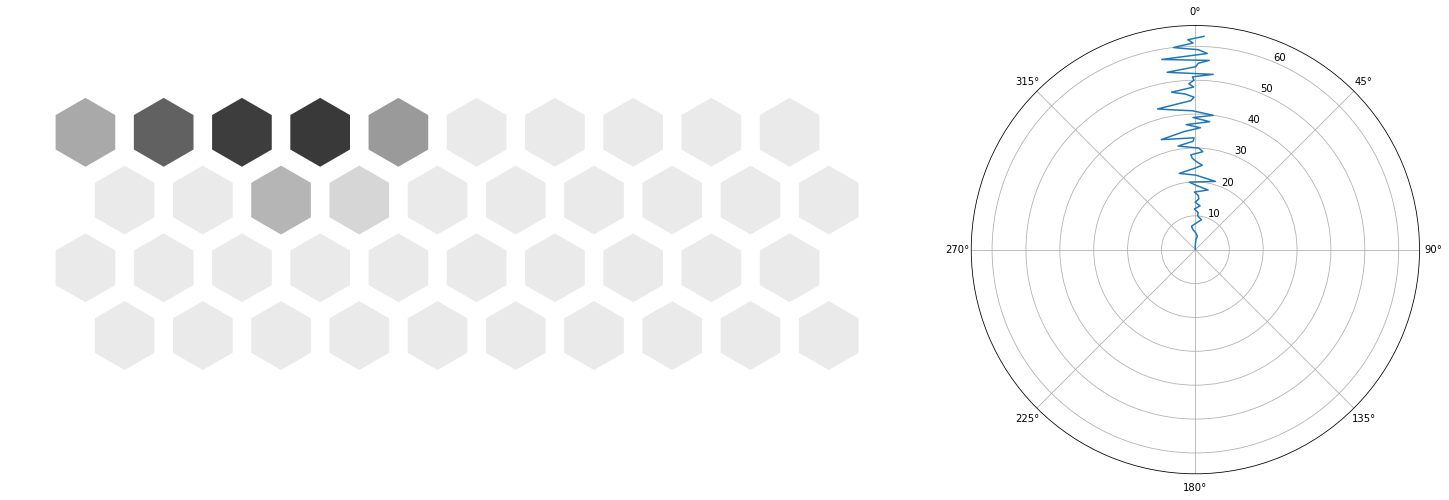

In [63]:
# Plots the mean positive correlated to data[time] neurons in SOM space. - a.k.a. the SOM projection
time=0
Imprime_evolucao_pend(som,cluster,Prct,PATTERN,time)

## Interactive plots

In [64]:
import ipywidgets as widgets
TIME_slider = widgets.IntSlider(
    description='Time:',
    value=0,
    min=0, max=Prct.shape[1]-1, step=1,
    layout=widgets.Layout(width='50%'))

In [67]:
from ipywidgets import interact

interact(EvolPlot_pend, t=TIME_slider)

interactive(children=(IntSlider(value=0, description='Time:', layout=Layout(width='50%'), max=1599), Output())…

<function __main__.EvolPlot_pend(t)>